In [33]:
from dv import AedatFile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [34]:
path = "C:/Users/schiavaz/lava-nc/depth/data/recorded/"

In [35]:
with AedatFile(path + "dvSave-horizontal.aedat4") as f:
    # list all the names of streams in the file
    imu_t = []
    imu_a = []
    # loop through the "events" stream as numpy packets
    for s in f['imu']:
        imu_t.append(s.timestamp)
        imu_a.append(s.accelerometer)

In [36]:
imu_t = np.array(imu_t)
imu_a = np.array(imu_a)
imu_a[:, 0] = savgol_filter(imu_a[:, 0], 100, 5)
imu_a[:, 1] = savgol_filter(imu_a[:, 1], 100, 5)
imu_a[:, 2] = savgol_filter(imu_a[:, 2], 100, 5)
# imu_a[:, 0] -= imu_a[0, 0]
# imu_a[:, 1] = imu[:, 1]
# imu_a[:, 2] = imu[:, 2]

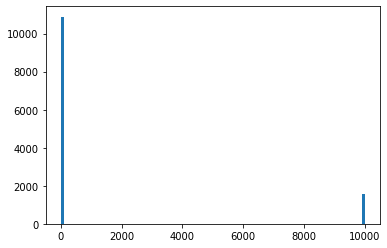

In [37]:
plt.hist(imu_t[1:] - imu_t[:-1], 100);

0.03836471811487469


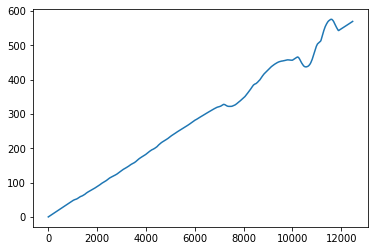

In [38]:
test = np.cumsum(imu_a[:, 0], axis=0)
plt.plot(test)
print(imu_a[-1, 0])

In [39]:
imu_no_g = np.copy(imu_a)
imu_no_g[:, 1] += 0.981
imu_no_g[:, 0] -= imu_no_g[0, 0]
imu_no_g[:, 1] -= imu_no_g[0, 1]
imu_no_g[:, 2] -= imu_no_g[0, 2]
imu_no_g[:, 0] = - imu_no_g[:, 0]
vel = np.cumsum(imu_no_g, axis=0)

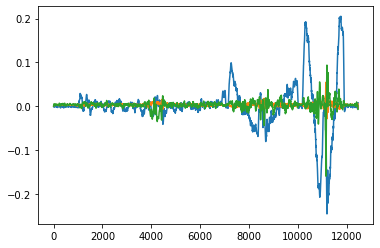

In [40]:
plt.plot(imu_no_g[:, 0])
plt.plot(imu_no_g[:, 1])
plt.plot(imu_no_g[:, 2])

In [41]:
# vel[:, 0] *= -1

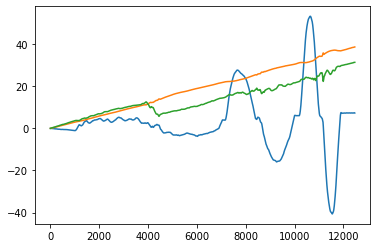

In [42]:
plt.plot(vel[:, 0])
plt.plot(vel[:, 1])
plt.plot(vel[:, 2])

In [43]:
imu_t = imu_t.astype(np.float64)

In [44]:
imu_t[:] *= 1e-6

In [45]:
imu_t[:] -= imu_t[0]

In [46]:
imu_t[0]

0.0

In [47]:
imu_t[-1]

15.801580905914307

In [48]:
vel.shape

(12469, 3)

In [49]:
imu_t.shape

(12469,)

In [50]:
imu_save = np.zeros((imu_t.shape[0], 7))

In [51]:
imu_save[:, 0] = imu_t

In [52]:
imu_save[:, 1:4] = vel

In [53]:
imu_save[:, 2] = 0
imu_save[:, 3] = 0

In [ ]:
np.savetxt(path + "imu.txt", imu_save, fmt="%.9f %.9f %.9f %.9f %.9f %.9f %.9f")

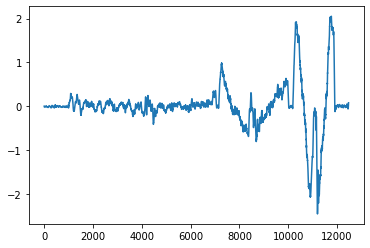

In [54]:
imu_a_save = np.zeros((imu_no_g.shape[0], 7))
imu_a_save[:, 1:4] = imu_no_g[:, :] * 10
imu_a_save[:, 0] = imu_t
plt.plot(imu_a_save[:, 1])

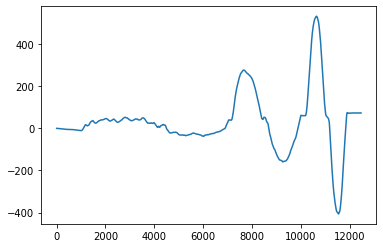

In [55]:
plt.plot(np.cumsum(imu_a_save[:, 1], axis=0))

In [56]:
np.savetxt(path + "imu_r.txt", imu_a_save, fmt="%.9f %.9f %.9f %.9f %.9f %.9f %.9f")

In [31]:
with AedatFile(path + "dvSave-horizontal.aedat4") as f:
    # list all the names of streams in the file
    
    # loop through the "events" stream as numpy packets
    events = np.hstack([packet for packet in f['events'].numpy()])

TypeError: '_AedatFileEventNumpyPacketIterator' object is not subscriptable

In [9]:
# events[:, 0] -= events[0][0]
# print(events[0][0])

In [10]:
events_save = np.array(events.tolist())

In [11]:
events_save = events_save[:, :4]

In [12]:
events_save = events_save.astype(np.float64)

In [13]:
# events_save[:, 0] *= 1e-6

In [14]:
events_save[:, 0] -= events_save[0, 0]

In [32]:
events_save[300, 0] * 1e-6

0.010001

In [ ]:
np.savetxt(path + "events.txt", events_save, fmt="%.9f %d %d %d")

In [ ]:
imu = np.loadtxt(path + "imu.txt")

In [ ]:
imu.shape

In [ ]:
plt.plot(imu[:, 1])

In [ ]:
vel = np.cumsum(imu[:, 1])
plt.plot(vel)